В данном файле мы проводим "разведку" по обработанным ранее данным, подмечаем некоторые закономерности и вносим какие-то предположения, которые впоследствии могут стать нашими гипотезами

**Расслабляющая музыка для проверки нашего творчества** <br>

https://youtu.be/0-NW47sXur0

In [1]:
# Импорт необходимых библиотек

import numpy as np
import pandas as pd
import re

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ExuberantSebastian/AnDan_Python_Project/main/EDA_1/data/GraphicsCards.csv')

In [3]:
df

,Видеокарта,Цена,комплектация,область применения,особенности,объем видеопамяти,тип памяти,частота памяти,шина обмена с памятью,частота видеопроцессора,разъемы и интерфейсы,тип подключения,поддержка технологий,разъем дополнительного питания,максимальное разрешение,количество поддерживаемых мониторов,техпроцесс
0,Видеокарта SAPPHIRE RX580 8 Гб V2,9899,Retail,игровая,нет,8192.0,GDDR5,1284.0,256.0,1340.0,"выход DVI, выход DisplayPort, выход HDMI",PCI Express 3.0,нет,8 pin,7680x4320,2,8.0
1,Видеокарта ASUS Dual GeForce RTX 3060 V2 OC Ed...,36500,Retail,игровая,необходимость дополнительного питания,12288.0,GDDR6,15000.0,192.0,1837.0,"выход DisplayPort, выход DisplayPort x 3, выхо...",PCI Express 4.0,"поддержка CUDA, поддержка HDCP, поддержка Vulk...",8 pin,7680x4320,4,8.0
2,Видеокарта GIGABYTE GeForce RTX 3070 Ti GAMING...,62000,Retail,игровая,нет,8192.0,GDDR6X,19000.0,256.0,1830.0,"выход DisplayPort x 2, выход HDMI x 2, интерфе...",PCI Express 4.0,нет,8 pin + 8 pin,7680x4320,4,8.0
3,Видеокарта БУ AMD RADEON RX 580 8Gb OC ASRock ...,8700,OEM,игровая,необходимость дополнительного питания,8192.0,GDDR5,8000.0,256.0,1424.0,"выход DVI, выход DisplayPort x 3, выход HDMI",PCI Express 3.0,нет,6 pin,7680x4320,5,14.0
4,"Видеокарта MSI GeForce RTX 3050 GAMING X 8G, R...",30734,Retail,игровая,необходимость дополнительного питания,8192.0,GDDR6,14000.0,128.0,1550.0,"выход DisplayPort x 3, выход HDMI",PCI Express 4.0,"поддержка CUDA, поддержка HDCP, поддержка трас...",8 pin,7680x4320,4,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,Видеокарта PCI-E nVidia MSI RTX 3050 Gaming X ...,31190,Retail,игровая,нет,8192.0,GDDR6,14000.0,256.0,1665.0,"выход DVI, выход DisplayPort, выход HDMI",PCI Express 4.0,нет,8 pin,7680x4320,2,8.0
1060,Видеокарта NVIDIA GeForce RTX 4070 MSI 12Gb (R...,90230,Retail,игровая,нет,12288.0,GDDR6X,2610.0,192.0,1920.0,"выход DisplayPort x 3, выход HDMI",PCI Express 4.0,нет,16 pin,7680x4320,4,5.0
1061,Видеокарта PALIT GeForce RTX 4070 GAMINGPRO 12G,79830,Retail,игровая,нет,12288.0,GDDR6X,21000.0,192.0,1920.0,"выход DisplayPort x 3, выход HDMI",PCI Express 4.0,нет,16 pin,7680x4320,2,8.0
1062,Видеокарта Inno3D nVidia GeForce RTX 3080 10Gb...,65367,Retail,игровая,нет,10240.0,GDDR6X,19000.0,320.0,1755.0,"выход DVI, выход DisplayPort, выход HDMI",PCI Express 4.0,нет,8 pin,4096x2160,2,8.0


Посмотрим на распределение цены и объема видеопамяти на наших наблюдениях

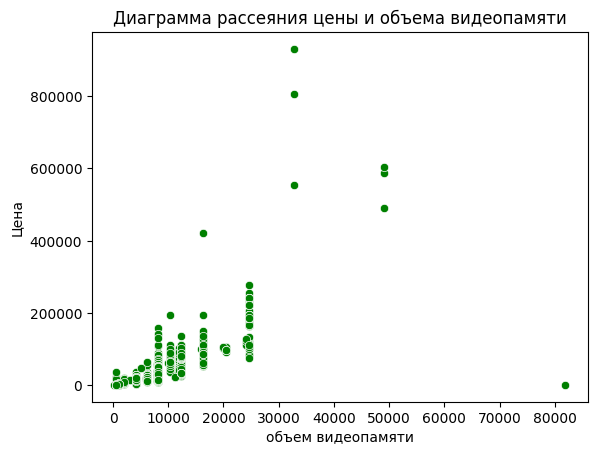

In [4]:
sns.scatterplot(x=df['объем видеопамяти'], y=df['Цена'], color='green').set(title='Диаграмма рассеяния цены и объема видеопамяти');


Уже проглядывается некоторая взаимосвязь, но нам явно мешают выбросы, или же это вовсе не выбросы?!?

In [5]:
df.loc[df['объем видеопамяти'] > 80000] #Видимо это ошибка Яндекс Маркета, она должна стоить примерно в 1000 раз дороже

,Видеокарта,Цена,комплектация,область применения,особенности,объем видеопамяти,тип памяти,частота памяти,шина обмена с памятью,частота видеопроцессора,разъемы и интерфейсы,тип подключения,поддержка технологий,разъем дополнительного питания,максимальное разрешение,количество поддерживаемых мониторов,техпроцесс
394,"Графический процессор TESLA A100 80GB HBM2, PC...",1520,Retail,игровая,нет,81920.0,HBM2,14000.0,384.0,1395.0,"выход DVI, выход DisplayPort, выход HDMI",PCI Express 4.0,нет,8 pin,4096x2160,2,12.0


In [6]:
df['Цена'].loc[df['объем видеопамяти'] > 80000] = 1520000 # Исправим это недоразумение

Исходя из представленного выше графика, видно,что выбросы есть.Однако в отличие от тех, что были на предыдущем этапе, эти выбросы - естественные. Появились они из-за наличия в нашем массиве данных **"Рабочих"** или же "Профессиональных" видеокарт, которые обладают рядом особенностей, отличающих их от "игровых" или же "обычных" карточек. Нам же принципиально важно, что они **дороже и намного сильнее** своих аналогов. Для дальнейшей обработки данных запишем наши игровые карточки в отдельный фрейм (рабочие ещё могут понадобиться).

P.s. мы знаем, что у некоторых карт указана неправильная область применения, потому делить будем по характеристикам.

In [7]:
df_pl = df.loc[df['объем видеопамяти'] < 30000]
df_pl

,Видеокарта,Цена,комплектация,область применения,особенности,объем видеопамяти,тип памяти,частота памяти,шина обмена с памятью,частота видеопроцессора,разъемы и интерфейсы,тип подключения,поддержка технологий,разъем дополнительного питания,максимальное разрешение,количество поддерживаемых мониторов,техпроцесс
0,Видеокарта SAPPHIRE RX580 8 Гб V2,9899,Retail,игровая,нет,8192.0,GDDR5,1284.0,256.0,1340.0,"выход DVI, выход DisplayPort, выход HDMI",PCI Express 3.0,нет,8 pin,7680x4320,2,8.0
1,Видеокарта ASUS Dual GeForce RTX 3060 V2 OC Ed...,36500,Retail,игровая,необходимость дополнительного питания,12288.0,GDDR6,15000.0,192.0,1837.0,"выход DisplayPort, выход DisplayPort x 3, выхо...",PCI Express 4.0,"поддержка CUDA, поддержка HDCP, поддержка Vulk...",8 pin,7680x4320,4,8.0
2,Видеокарта GIGABYTE GeForce RTX 3070 Ti GAMING...,62000,Retail,игровая,нет,8192.0,GDDR6X,19000.0,256.0,1830.0,"выход DisplayPort x 2, выход HDMI x 2, интерфе...",PCI Express 4.0,нет,8 pin + 8 pin,7680x4320,4,8.0
3,Видеокарта БУ AMD RADEON RX 580 8Gb OC ASRock ...,8700,OEM,игровая,необходимость дополнительного питания,8192.0,GDDR5,8000.0,256.0,1424.0,"выход DVI, выход DisplayPort x 3, выход HDMI",PCI Express 3.0,нет,6 pin,7680x4320,5,14.0
4,"Видеокарта MSI GeForce RTX 3050 GAMING X 8G, R...",30734,Retail,игровая,необходимость дополнительного питания,8192.0,GDDR6,14000.0,128.0,1550.0,"выход DisplayPort x 3, выход HDMI",PCI Express 4.0,"поддержка CUDA, поддержка HDCP, поддержка трас...",8 pin,7680x4320,4,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,Видеокарта PCI-E nVidia MSI RTX 3050 Gaming X ...,31190,Retail,игровая,нет,8192.0,GDDR6,14000.0,256.0,1665.0,"выход DVI, выход DisplayPort, выход HDMI",PCI Express 4.0,нет,8 pin,7680x4320,2,8.0
1060,Видеокарта NVIDIA GeForce RTX 4070 MSI 12Gb (R...,90230,Retail,игровая,нет,12288.0,GDDR6X,2610.0,192.0,1920.0,"выход DisplayPort x 3, выход HDMI",PCI Express 4.0,нет,16 pin,7680x4320,4,5.0
1061,Видеокарта PALIT GeForce RTX 4070 GAMINGPRO 12G,79830,Retail,игровая,нет,12288.0,GDDR6X,21000.0,192.0,1920.0,"выход DisplayPort x 3, выход HDMI",PCI Express 4.0,нет,16 pin,7680x4320,2,8.0
1062,Видеокарта Inno3D nVidia GeForce RTX 3080 10Gb...,65367,Retail,игровая,нет,10240.0,GDDR6X,19000.0,320.0,1755.0,"выход DVI, выход DisplayPort, выход HDMI",PCI Express 4.0,нет,8 pin,4096x2160,2,8.0


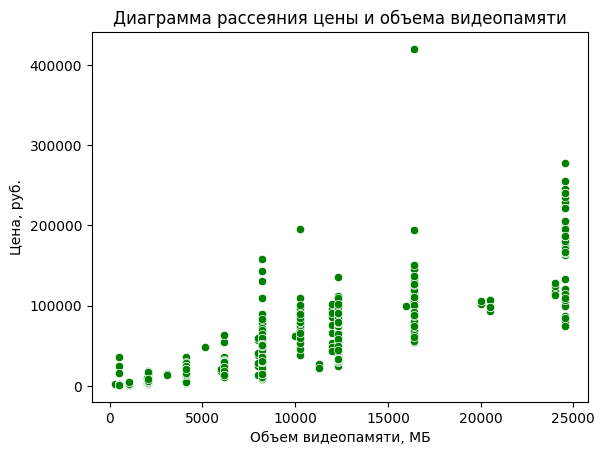

In [8]:
sns.scatterplot(x=df_pl['объем видеопамяти'], y=df_pl['Цена'], color='green').set(title='Диаграмма рассеяния цены и объема видеопамяти',
                                                                                  xlabel='Объем видеопамяти, МБ',
                                                                                  ylabel='Цена, руб.');

Теперь остался лишь один явный выброс, он нам как водится, не нужен

In [9]:
df_pl = df_pl.loc[df_pl['Цена'] < 400000] # В принципе можно было сразу так сделать

Теперь посмотрим на данные после очистки, давайте прогоним нашу цену в паре с другими числовыми данными, как центральный признак, который мы впоследствии будем предсказывать, возможно, обнаружится какая-то взаимосвязь.

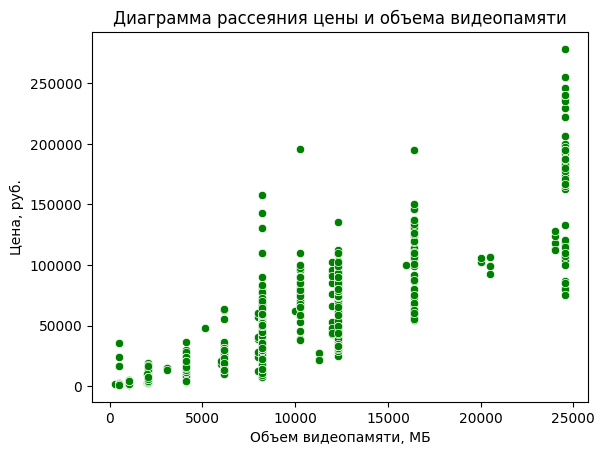

In [10]:
sns.scatterplot(x=df_pl['объем видеопамяти'], y=df_pl['Цена'], color='green').set(title='Диаграмма рассеяния цены и объема видеопамяти',
                                                                                  xlabel='Объем видеопамяти, МБ',
                                                                                  ylabel='Цена, руб.');

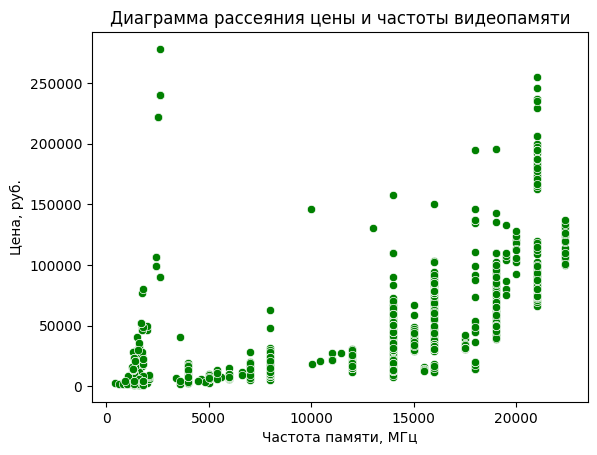

In [11]:
sns.scatterplot(x=df_pl['частота памяти'], y=df_pl['Цена'], color='green').set(title='Диаграмма рассеяния цены и частоты видеопамяти',
                                                                               xlabel='Частота памяти, МГц',
                                                                               ylabel='Цена, руб.');

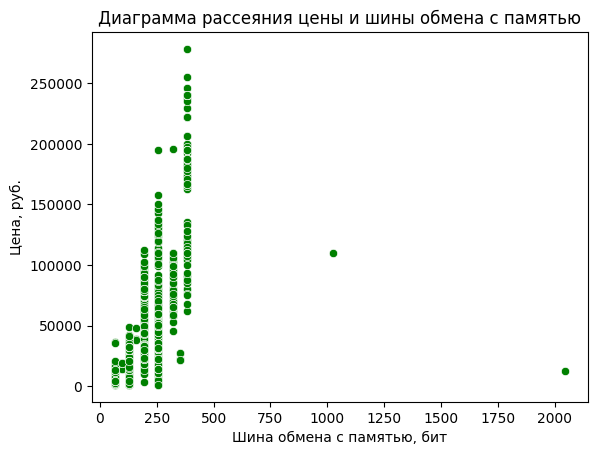

In [12]:
sns.scatterplot(x=df_pl['шина обмена с памятью'], y=df_pl['Цена'], color='green').set(title='Диаграмма рассеяния цены и шины обмена с памятью',
                                                                                      xlabel='Шина обмена с памятью, бит',
                                                                                      ylabel='Цена, руб.');

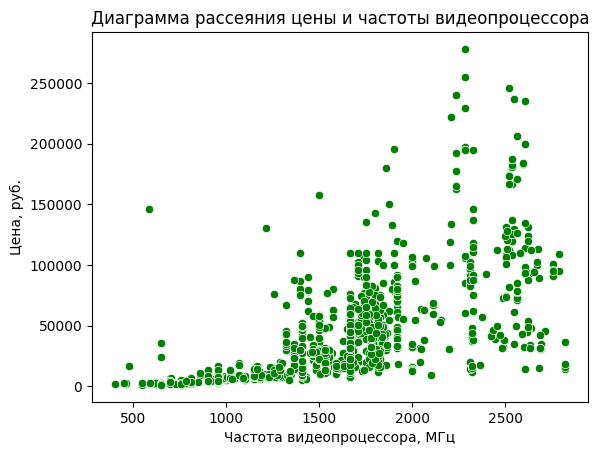

In [13]:
sns.scatterplot(x=df_pl['частота видеопроцессора'], y=df_pl['Цена'], color='green').set(title='Диаграмма рассеяния цены и частоты видеопроцессора',
                                                                                        xlabel='Частота видеопроцессора, МГц',
                                                                                        ylabel='Цена, руб.');

По представленным графикам можно сделать вывод, что использованные признаки, **возможно**, имеют линейную положительную взаимосвязь с ценой, за некоторыми исключениями, от большей части которых мы избавились в предыдущих шагах.

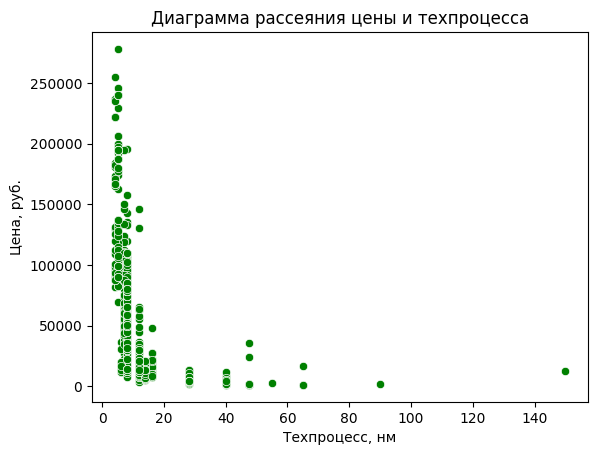

In [14]:
  sns.scatterplot(x=df_pl['техпроцесс'], y=df_pl['Цена'], color='green').set(title='Диаграмма рассеяния цены и техпроцесса',
                                                                           xlabel='Техпроцесс, нм',
                                                                           ylabel='Цена, руб.');

С техпроцессом другая история, тут скоре всего присутствует **обратная взаимосвязь**, что в принципе вполне логично. Компании уже очень давно соревнуются между собой в сокращении этого показателя, т.к. он напрямую влияет на производительность. В последнее время у новых видеочипов данный показатель имеет тенденцию сокращаться, а себестоимость - расти.

В прошлом файлике мы уже строили корреляционную матрицу, давайте повторим данный подвиг, чтобы окончательно убедиться в наших доводах


In [15]:
num_data = ['Цена', 'объем видеопамяти', 'частота памяти', 'частота видеопроцессора','шина обмена с памятью', 'техпроцесс']
df_pl[num_data].corr()

,Цена,объем видеопамяти,частота памяти,частота видеопроцессора,шина обмена с памятью,техпроцесс
Цена,1.000000,0.865692,0.575021,0.636715,0.569510,-0.468409
объем видеопамяти,0.865692,1.000000,0.653715,0.699828,0.627121,-0.571395
частота памяти,0.575021,0.653715,1.000000,0.766042,0.430038,-0.672587
частота видеопроцессора,0.636715,0.699828,0.766042,1.000000,0.350812,-0.718568
шина обмена с памятью,0.569510,0.627121,0.430038,0.350812,1.000000,-0.182877
техпроцесс,-0.468409,-0.571395,-0.672587,-0.718568,-0.182877,1.000000


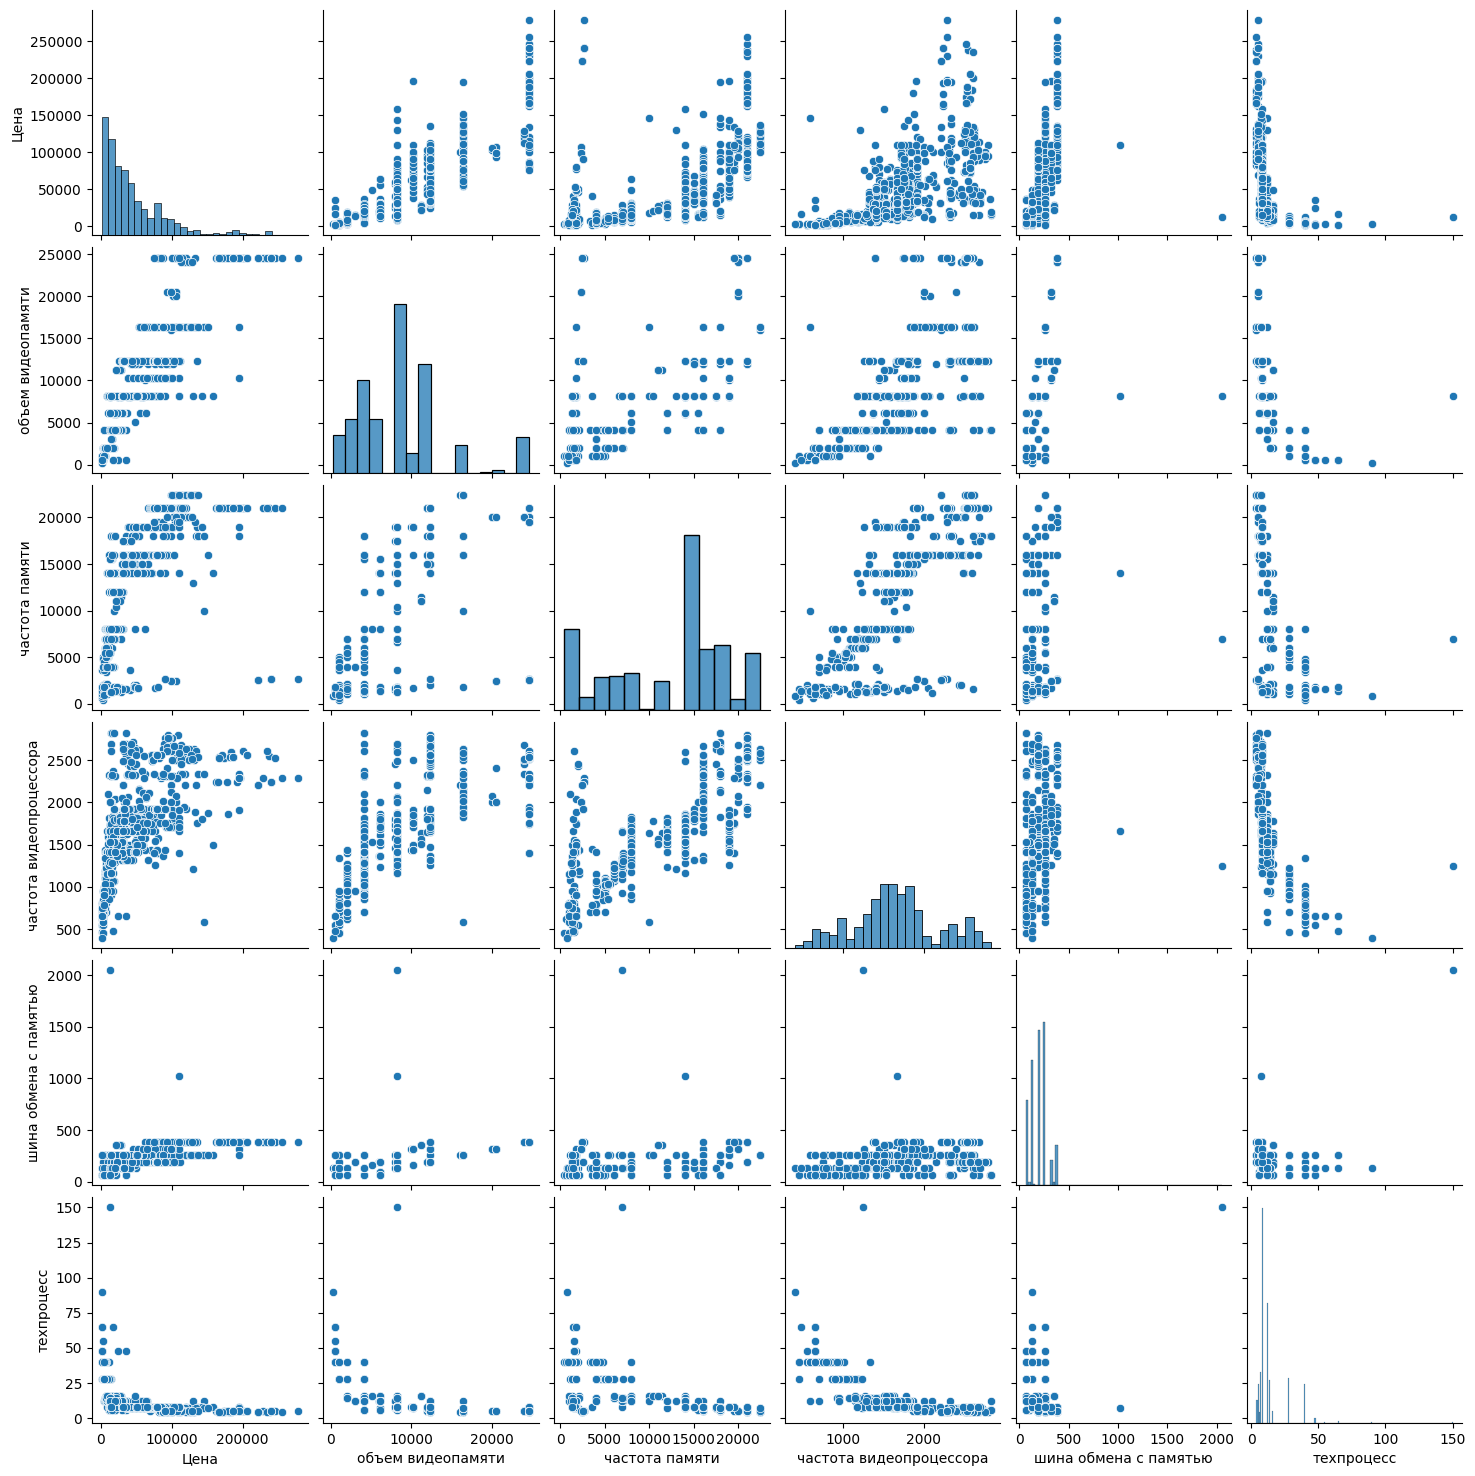

In [16]:
sns.pairplot(df_pl[num_data]);

Первый раз случайность, второй - совпадение,третий - закономерность, связь явно присутствует и именно такая, какой мы её описывали. Также стоит сказать, что все наши числовые признаки так или иначе друг с другом взаимосвязаны, это определённо хорошо, т.к. мы сможем посторить линейную регрессию, которая будет более менее нормально предсказывать то, что мы захотим предсказать:)

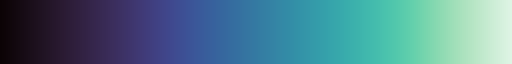

In [17]:
sns.set(rc={'figure.figsize':(18,7)}) # Это было сделанно, чтобы наши наблюдения были читаемыми
sns.color_palette("mako", as_cmap=True) # А это просто для красоты, быть может используем

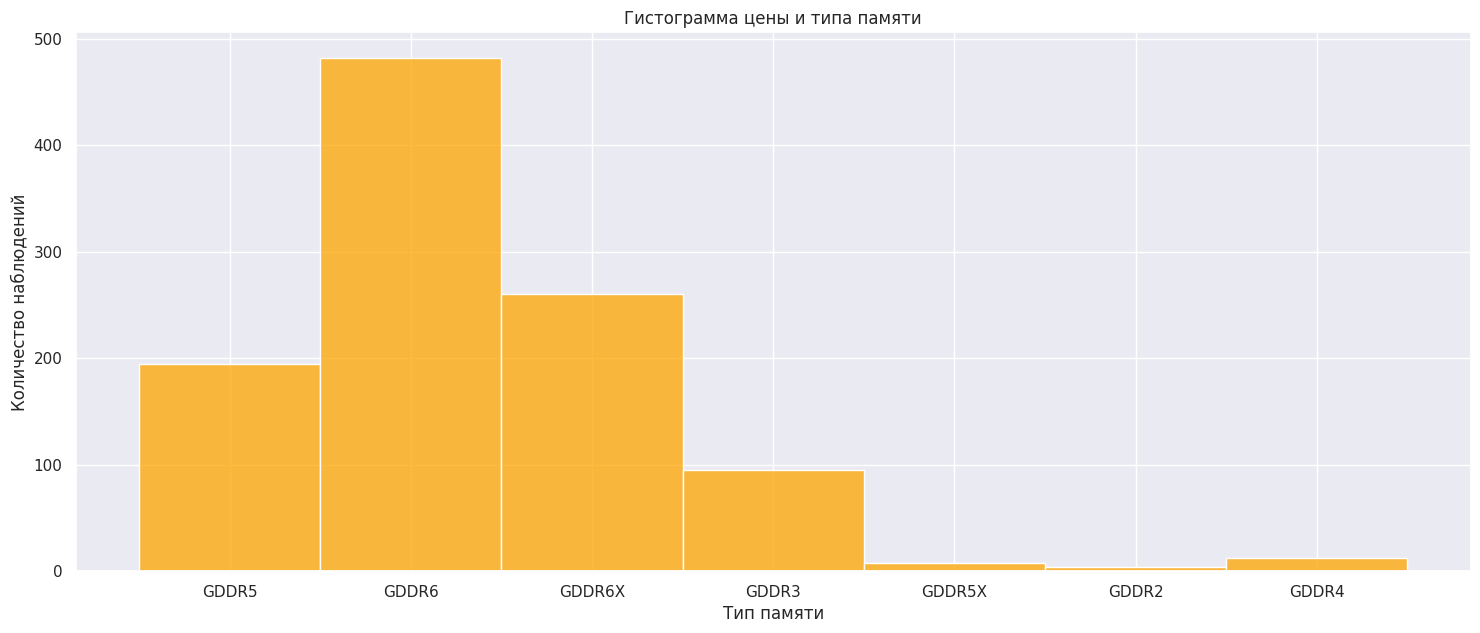

In [18]:
sns.histplot(data=df_pl, x='тип памяти', color='orange').set(title='Гистограмма цены и типа памяти',
                                             xlabel='Тип памяти',
                                             ylabel='Количество наблюдений');

Как мы видим, большая часть типов памяти в нашей выборке состоит из относительно новой GDDR6, на практике же, если рассматривать БУ рынок, GDDR5 будет побольше, но так как мы его не рассматриваем это ещё одно подтверждение реалистичности нашего графика, возможно, впоследствии этот момент ещё сыграет свою роль, поскольку "новая" память по себестоимости дороже и эффективнее "старой" 

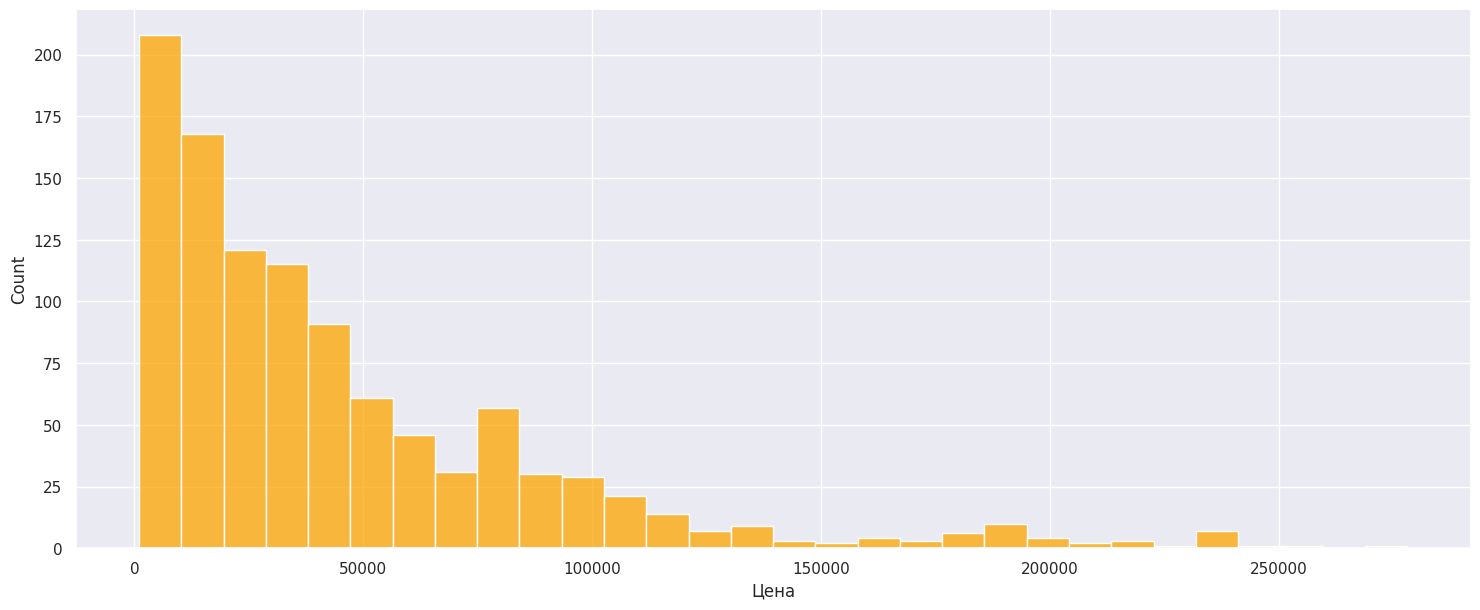

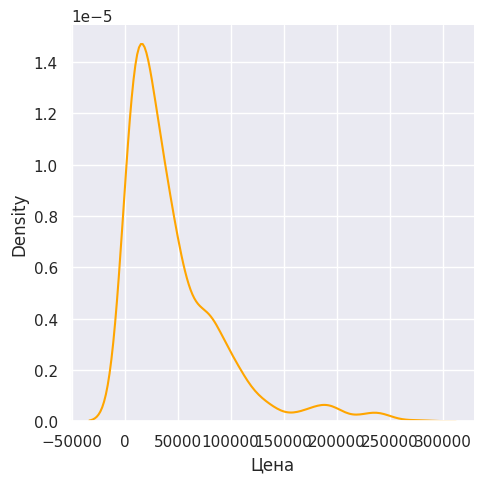

In [111]:
sns.histplot(data=df_pl, x='Цена', color='orange')
sns.displot(data=df_pl, x='Цена', color='orange', kind="kde"); # Напоминает экспоненциальное распределение

p.s. нервы писавшего это сдались раньше, чем кривизна функции плотности...

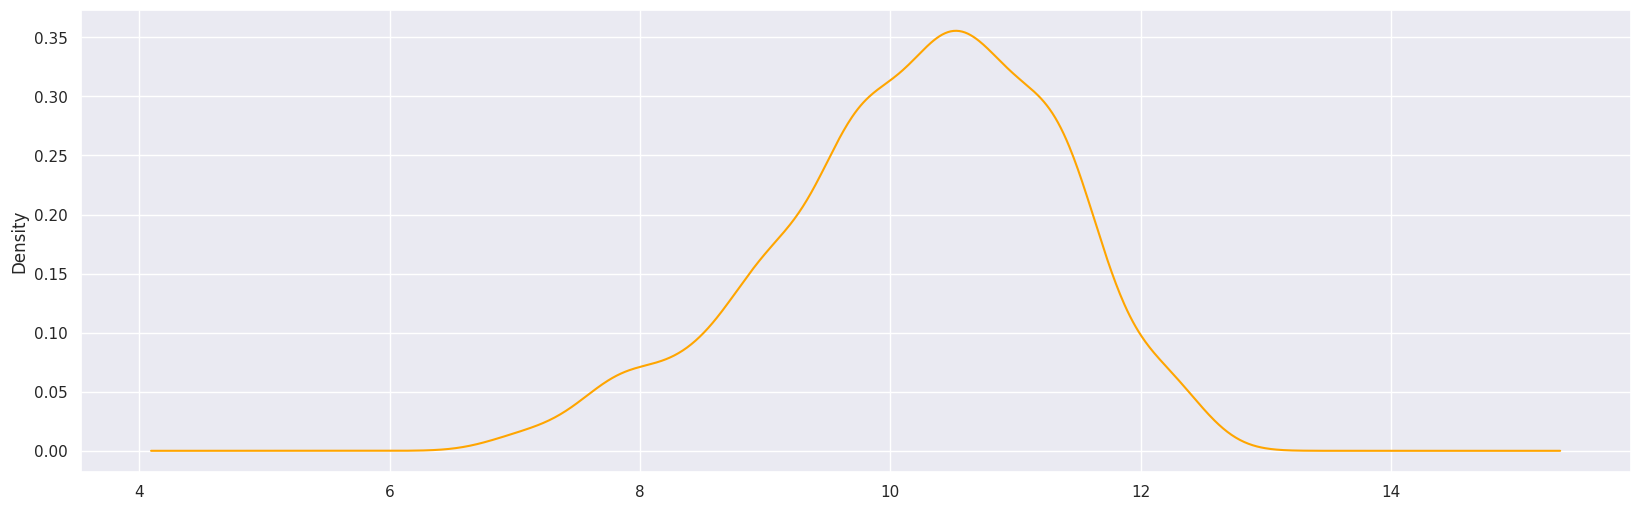

In [114]:
# Немного сгладим данные 

df_pl['Цена'].apply(lambda x: np.log(x + 1)).plot(figsize=(20, 6), kind='kde', color='orange');

# Никакого сакрального смысла в данном действии не крылось 

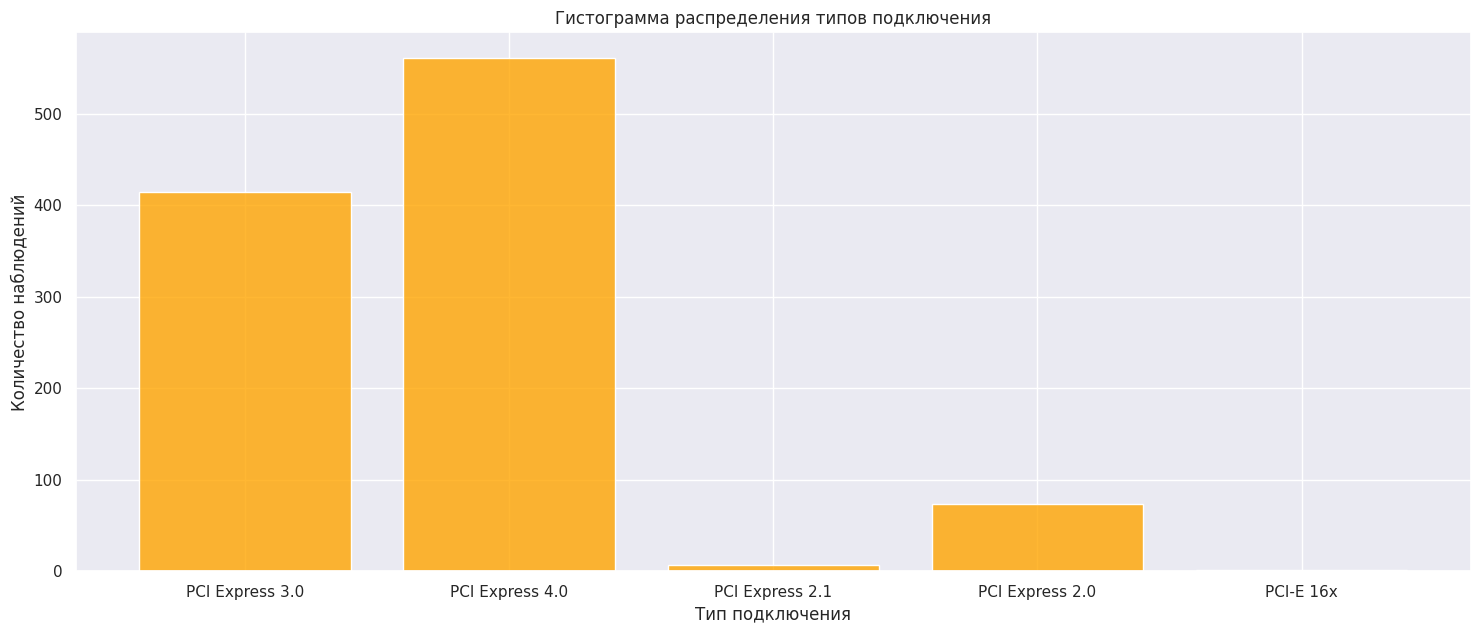

In [20]:
sns.histplot(data=df_pl, x='тип подключения', shrink=.8, alpha=.8, color='orange').set(title='Гистограмма распределения типов подключения',
                                             xlabel='Тип подключения',
                                             ylabel='Количество наблюдений'); 

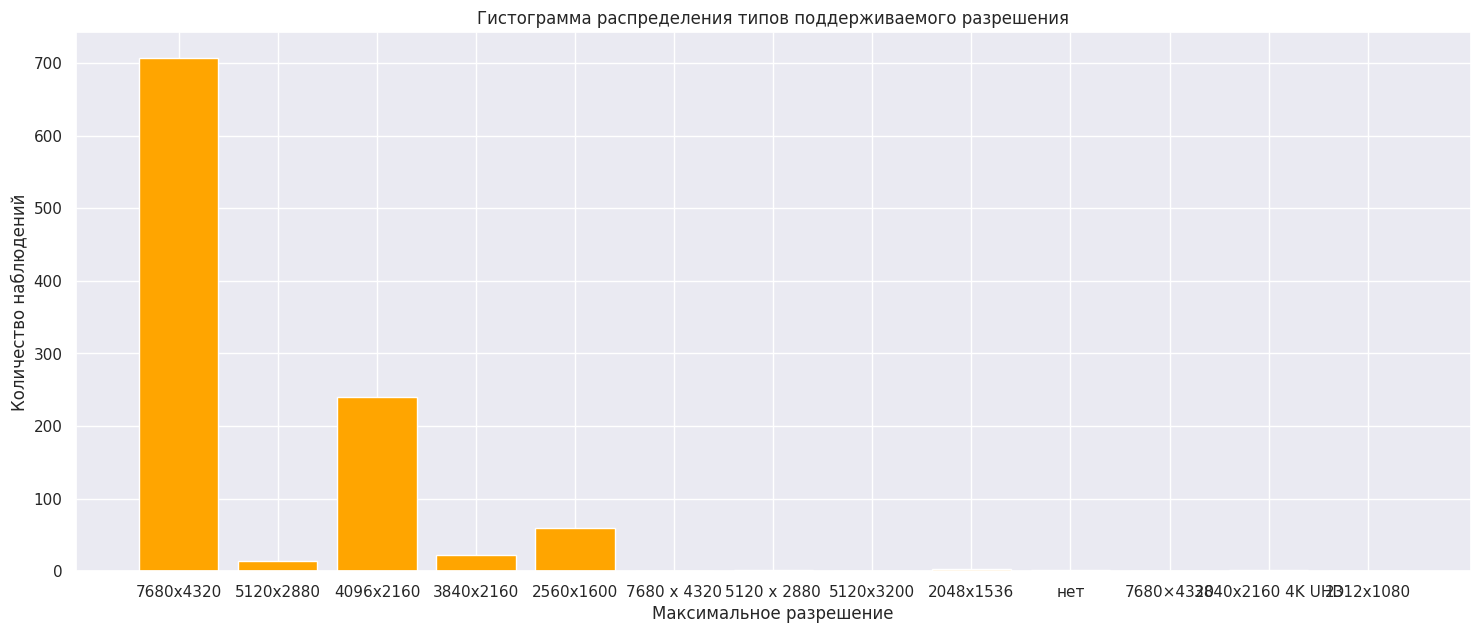

In [21]:
sns.histplot(data=df_pl, x='максимальное разрешение', shrink=0.8, alpha=1, color='orange').set(title='Гистограмма распределения типов поддерживаемого разрешения',
                                             xlabel='Максимальное разрешение',
                                             ylabel='Количество наблюдений');

Тут мы можем сделать вывод, что у нас немало странных выбросов, которые в принципе никак не должны мешать работе кода, также стоит сказать, что большая часть карт поддерживает Full HD, 2K или же 4К разрешение

## Создание и применение нового признака ##

На следующем шаге мы решили добавить новую фичу, которой не было в исходных данных, а именно - компанию. Это важный фактор, поскольку компаний, что производят видеочипы мало, а главное - у них разная ценовая политика, это определённо понадобится нам на этапе построения гипотез

In [69]:
# Создаём лист с фичами названий каких-то конкретных фирм

nvidia_features = ['NVIDIA', 'nVidia', 'RTX', 'GTX', 'GT', 'GeForce', 'geforce', 'PNY', 'P400', 'Matrox', 'HP', 'N306', 'Tesla', 'TESLA']
amd_faetures = ['AMD', 'amd', 'RX', 'rx', 'Rx', 'R9', 'RADEON', 'Radeon', 'radeon', 'HD6850', 'Pulse']
intel_features = ['Arc', 'A310', 'INTEL', 'Intel']

# Раскидываем названия по фичам

df_pl['NVIDIA'] = df_pl['Видеокарта'].str.contains('|'.join(nvidia_features))
df_pl['AMD'] = df_pl['Видеокарта'].str.contains('|'.join(amd_faetures))
df_pl['INTEL'] = df_pl['Видеокарта'].str.contains('|'.join(intel_features))
df_pl['NVIDIA'].loc[(df_pl['AMD'] == True) & (df_pl['NVIDIA'] == True)] = False # Два признака попали в одно название

# Создадим отдельную колонку с названиями, чтобы было

df_pl['Компания'] = df_pl['тип подключения']
df_pl['Компания'].loc[df_pl['NVIDIA'] == True] = 'NVIDIA'
df_pl['Компания'].loc[df_pl['AMD'] == True] = 'AMD'
df_pl['Компания'].loc[df_pl['INTEL'] == True] = 'INTEL'

df_pl

,Видеокарта,Цена,комплектация,область применения,особенности,объем видеопамяти,тип памяти,частота памяти,шина обмена с памятью,частота видеопроцессора,...,тип подключения,поддержка технологий,разъем дополнительного питания,максимальное разрешение,количество поддерживаемых мониторов,техпроцесс,NVIDIA,AMD,INTEL,Компания
0,Видеокарта SAPPHIRE RX580 8 Гб V2,9899,Retail,игровая,нет,8192.0,GDDR5,1284.0,256.0,1340.0,...,PCI Express 3.0,нет,8 pin,7680x4320,2,8.0,False,True,False,AMD
1,Видеокарта ASUS Dual GeForce RTX 3060 V2 OC Ed...,36500,Retail,игровая,необходимость дополнительного питания,12288.0,GDDR6,15000.0,192.0,1837.0,...,PCI Express 4.0,"поддержка CUDA, поддержка HDCP, поддержка Vulk...",8 pin,7680x4320,4,8.0,True,False,False,NVIDIA
2,Видеокарта GIGABYTE GeForce RTX 3070 Ti GAMING...,62000,Retail,игровая,нет,8192.0,GDDR6X,19000.0,256.0,1830.0,...,PCI Express 4.0,нет,8 pin + 8 pin,7680x4320,4,8.0,True,False,False,NVIDIA
3,Видеокарта БУ AMD RADEON RX 580 8Gb OC ASRock ...,8700,OEM,игровая,необходимость дополнительного питания,8192.0,GDDR5,8000.0,256.0,1424.0,...,PCI Express 3.0,нет,6 pin,7680x4320,5,14.0,False,True,False,AMD
4,"Видеокарта MSI GeForce RTX 3050 GAMING X 8G, R...",30734,Retail,игровая,необходимость дополнительного питания,8192.0,GDDR6,14000.0,128.0,1550.0,...,PCI Express 4.0,"поддержка CUDA, поддержка HDCP, поддержка трас...",8 pin,7680x4320,4,8.0,True,False,False,NVIDIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,Видеокарта PCI-E nVidia MSI RTX 3050 Gaming X ...,31190,Retail,игровая,нет,8192.0,GDDR6,14000.0,256.0,1665.0,...,PCI Express 4.0,нет,8 pin,7680x4320,2,8.0,True,False,False,NVIDIA
1060,Видеокарта NVIDIA GeForce RTX 4070 MSI 12Gb (R...,90230,Retail,игровая,нет,12288.0,GDDR6X,2610.0,192.0,1920.0,...,PCI Express 4.0,нет,16 pin,7680x4320,4,5.0,True,False,False,NVIDIA
1061,Видеокарта PALIT GeForce RTX 4070 GAMINGPRO 12G,79830,Retail,игровая,нет,12288.0,GDDR6X,21000.0,192.0,1920.0,...,PCI Express 4.0,нет,16 pin,7680x4320,2,8.0,True,False,False,NVIDIA
1062,Видеокарта Inno3D nVidia GeForce RTX 3080 10Gb...,65367,Retail,игровая,нет,10240.0,GDDR6X,19000.0,320.0,1755.0,...,PCI Express 4.0,нет,8 pin,4096x2160,2,8.0,True,False,False,NVIDIA


In [68]:
# Проверим на выбросы

df_pl.loc[(df_pl['Компания'] != 'NVIDIA') & (df_pl['Компания'] != 'AMD') & (df_pl['Компания'] != 'INTEL')]

# Замурчательно!

,Видеокарта,Цена,комплектация,область применения,особенности,объем видеопамяти,тип памяти,частота памяти,шина обмена с памятью,частота видеопроцессора,...,тип подключения,поддержка технологий,разъем дополнительного питания,максимальное разрешение,количество поддерживаемых мониторов,техпроцесс,NVIDIA,AMD,INTEL,Компания


Теперь посмотрим на графиках, что к чему

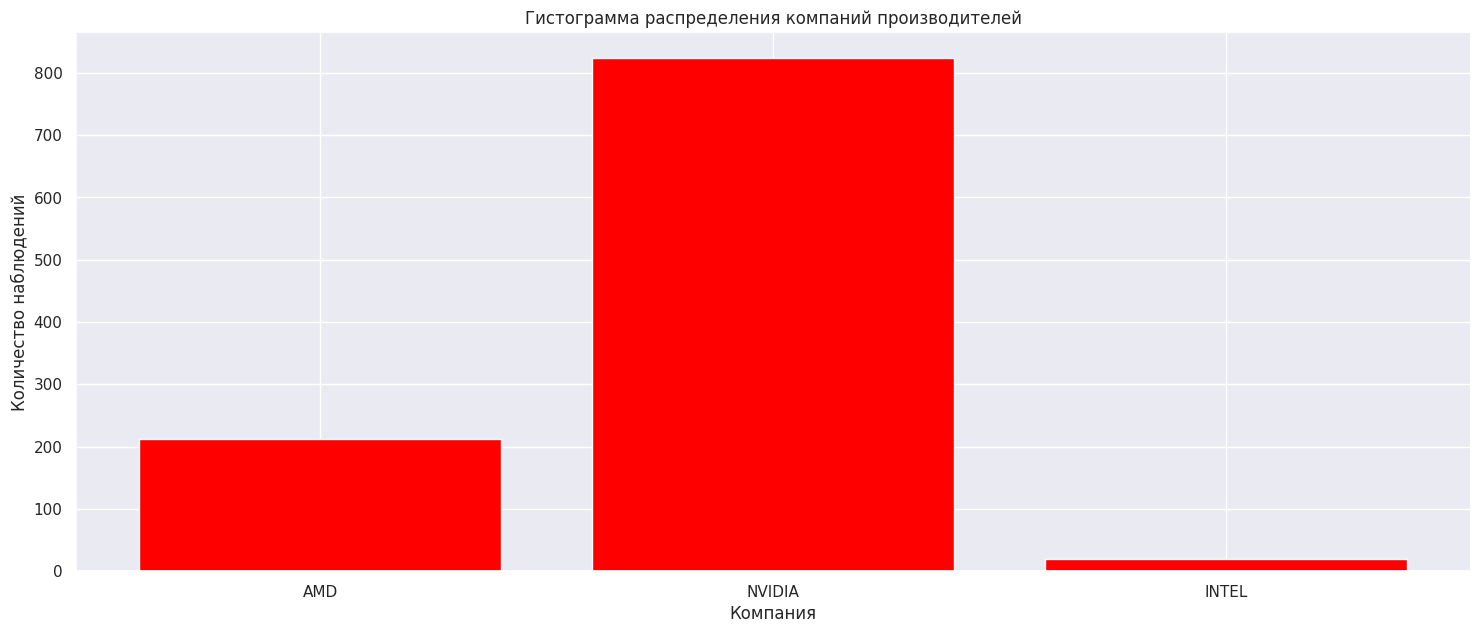

In [75]:
sns.histplot(data=df_pl, x='Компания', shrink=0.8, alpha=1, color='red').set(title='Гистограмма распределения компаний производителей',
                                                                             xlabel='Компания',
                                                                             ylabel='Количество наблюдений');

Как мы видим, у nvidia имеется заметный перевес, что логично, ибо компания дольше прочих существует на рынке теперь сделаем небольшую графическую подводку к будущим гипотезам

In [78]:
num_data.append('Компания')
num_data

['Цена',
 'объем видеопамяти',
 'частота памяти',
 'частота видеопроцессора',
 'шина обмена с памятью',
 'техпроцесс',
 'Компания']

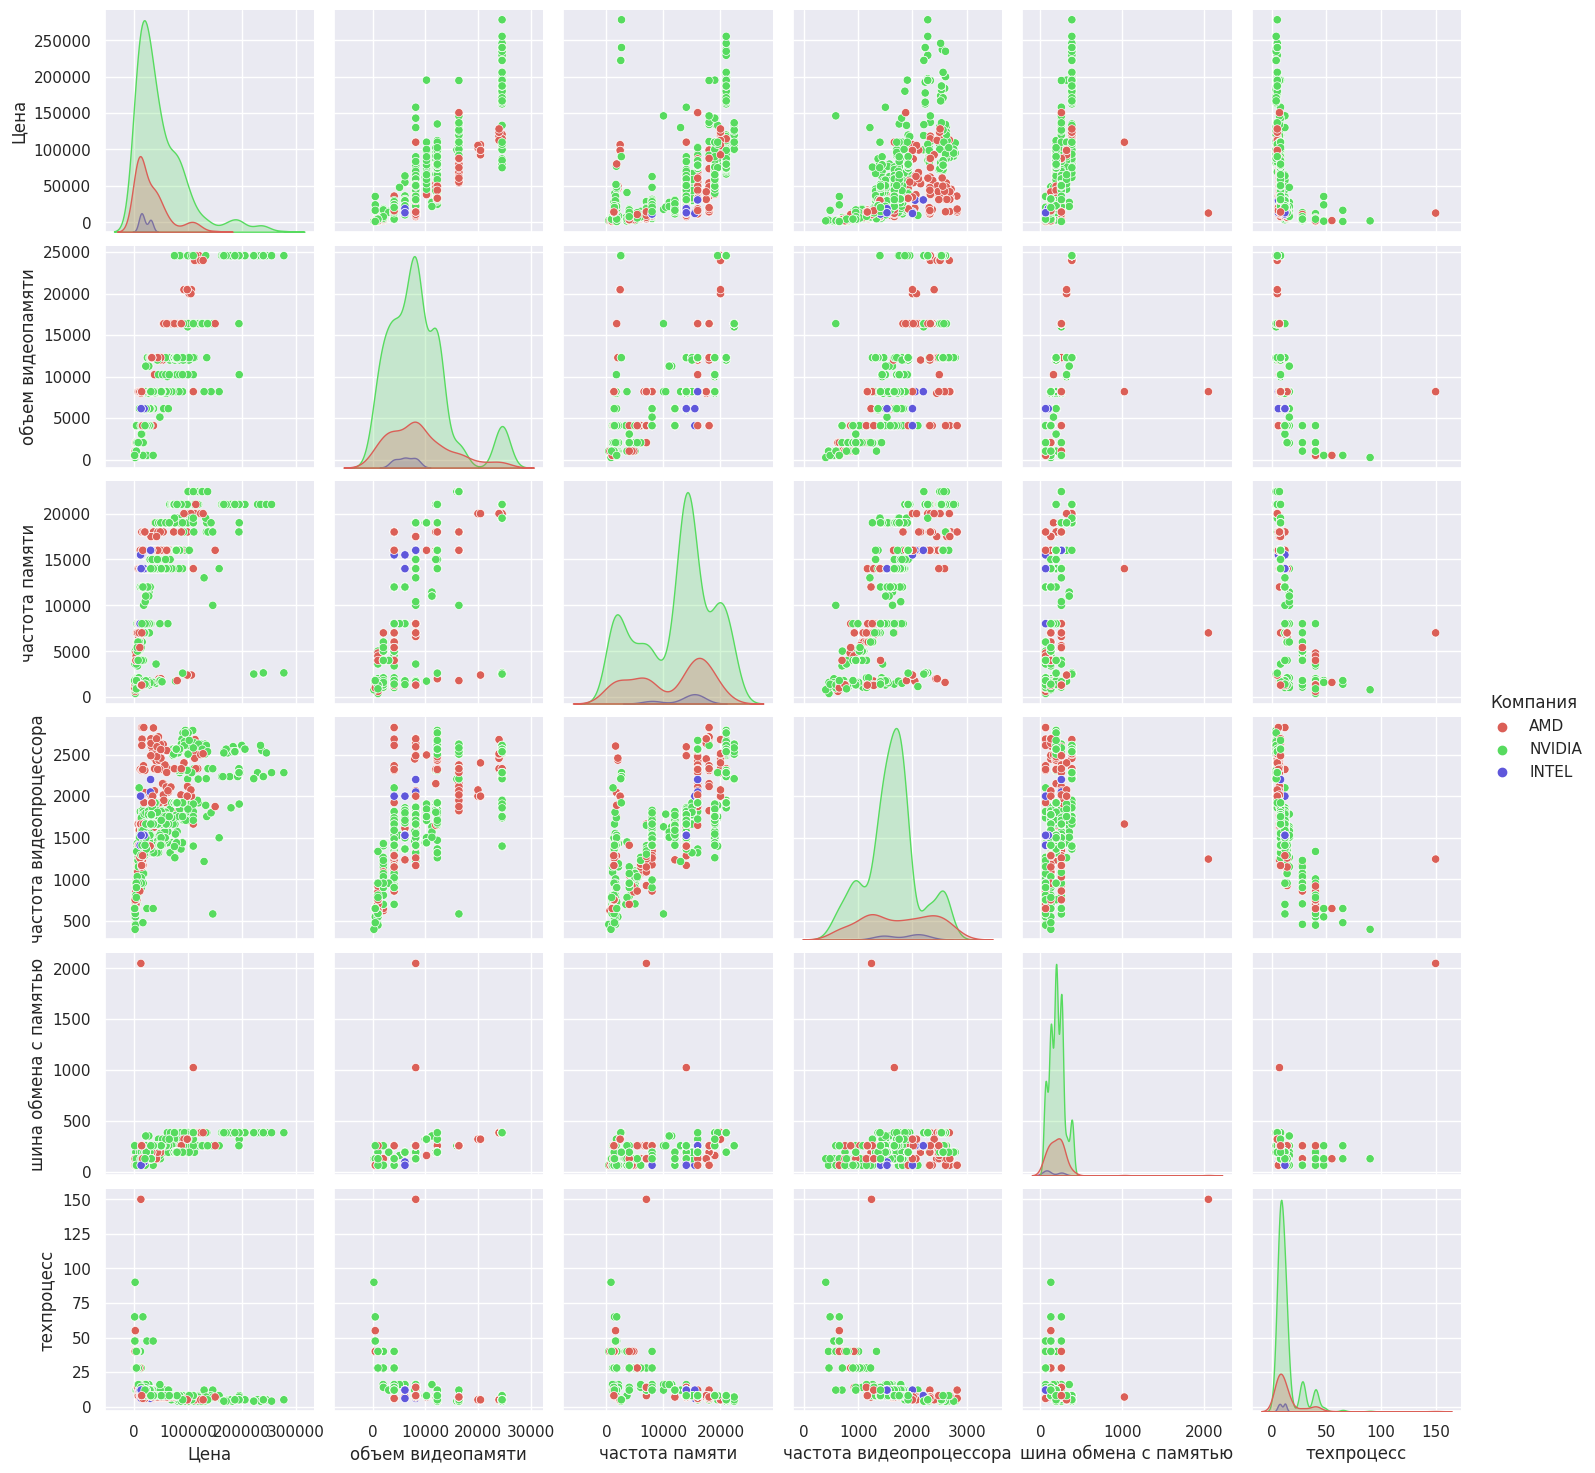

In [80]:
sns.pairplot(df_pl[num_data], hue="Компания", palette='hls');

<H1> <center> Больше графиков богу графиков!!! </center> <H1>

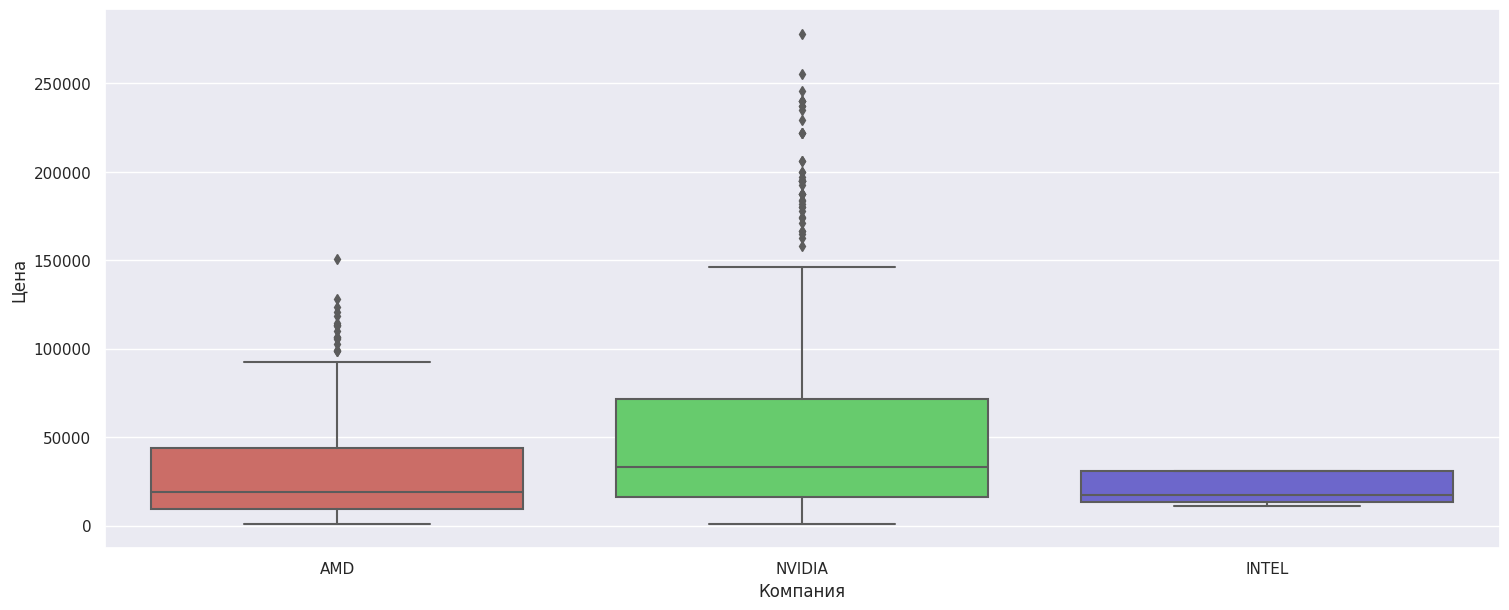

In [116]:
sns.boxplot(x='Компания', 
            y='Цена', 
            data=df_pl, 
            palette='hls')

plt.xlabel('Компания')
plt.ylabel('Цена');

У нас немало выбросов у NVIDIA и AMD, это связано с делением на старые и новые модели, по cути у нас образовалось что-то вроде двухмодальной системы, это также можно проследить на гистограме ценового распределения, её функции плотности и некоторых других гистограммах (см. "перекрёсные" графики выше)

Сделать с данной особенностью данных, увы, ничего не получится, но это не должно помешать обучению модели, ибо с ценой показатели росли +- пропорционально 

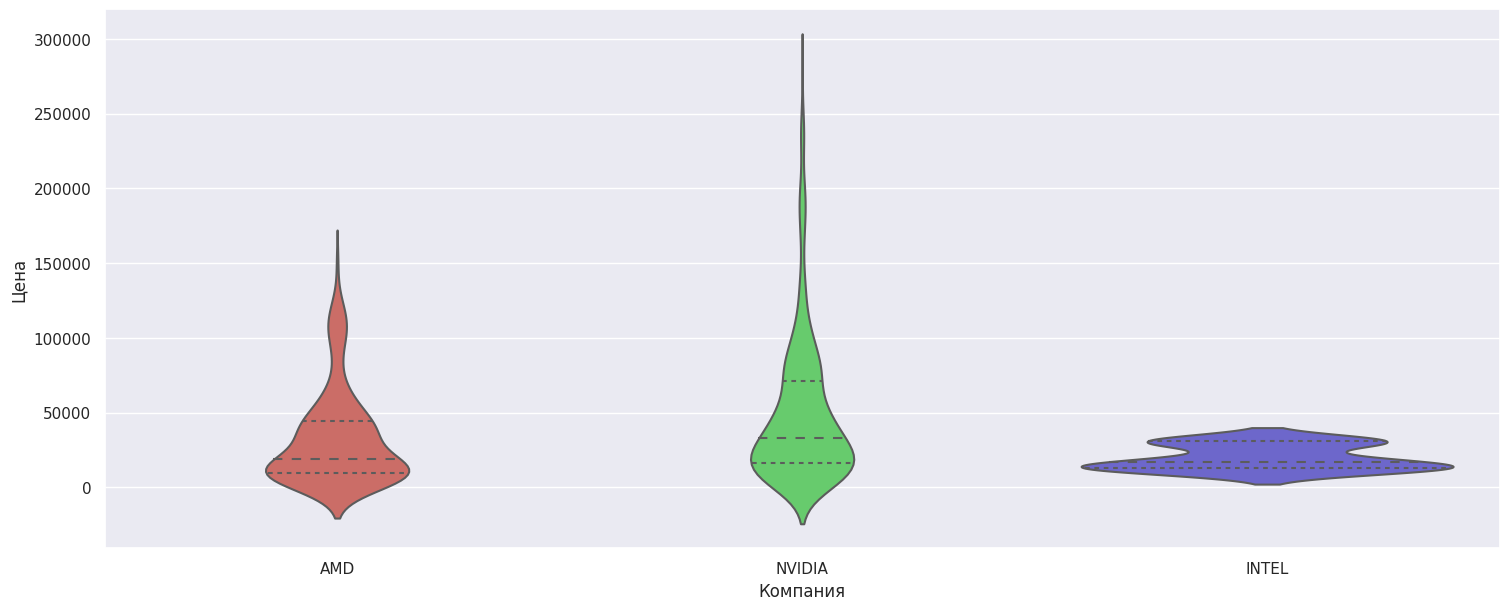

In [118]:
sns.violinplot(x='Компания', 
               y='Цена', 
               data=df_pl, 
               inner="quartile",
               palette='hls')

plt.xlabel('Компания')
plt.ylabel('Цена');

Тут можно сказать, что большая часть видеокарт стоит дешевле 50000, давайте сопоставим данный график с главной числовой характеристикой

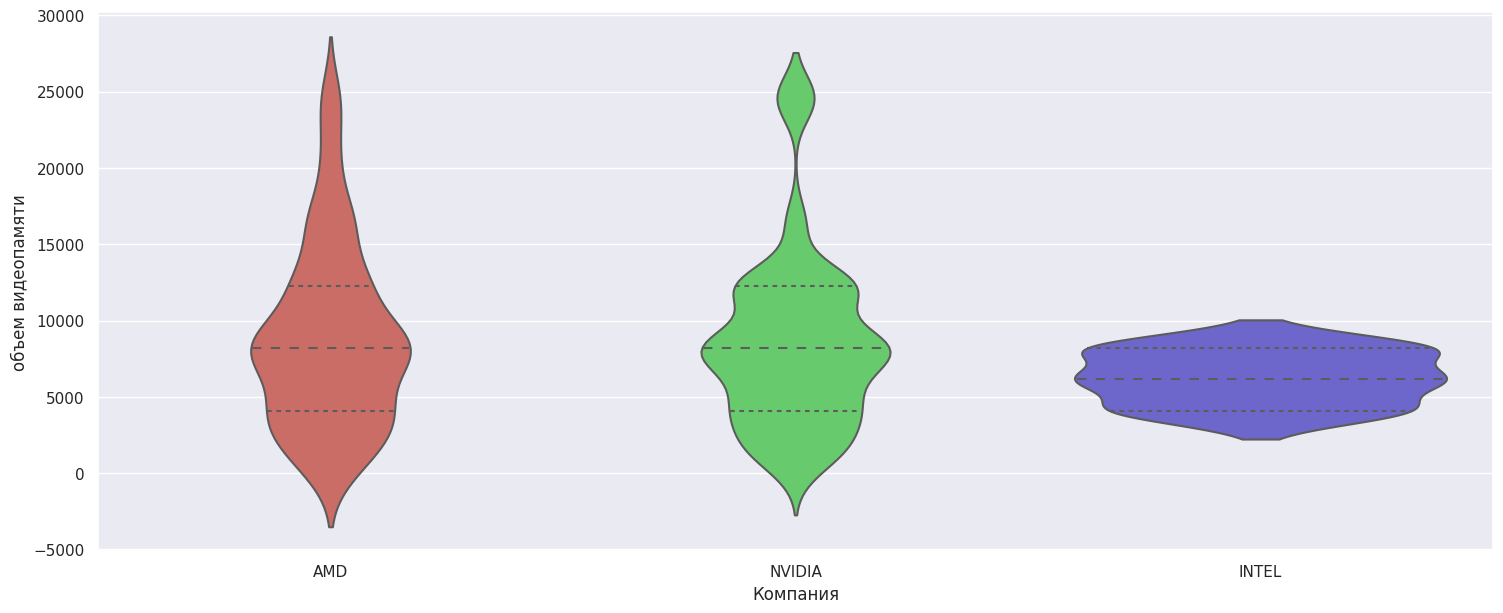

In [119]:
sns.violinplot(x='Компания', 
               y='объем видеопамяти', 
               data=df_pl, 
               inner="quartile",
               palette='hls')

plt.xlabel('Компания')
plt.ylabel('Объем видеопамяти');

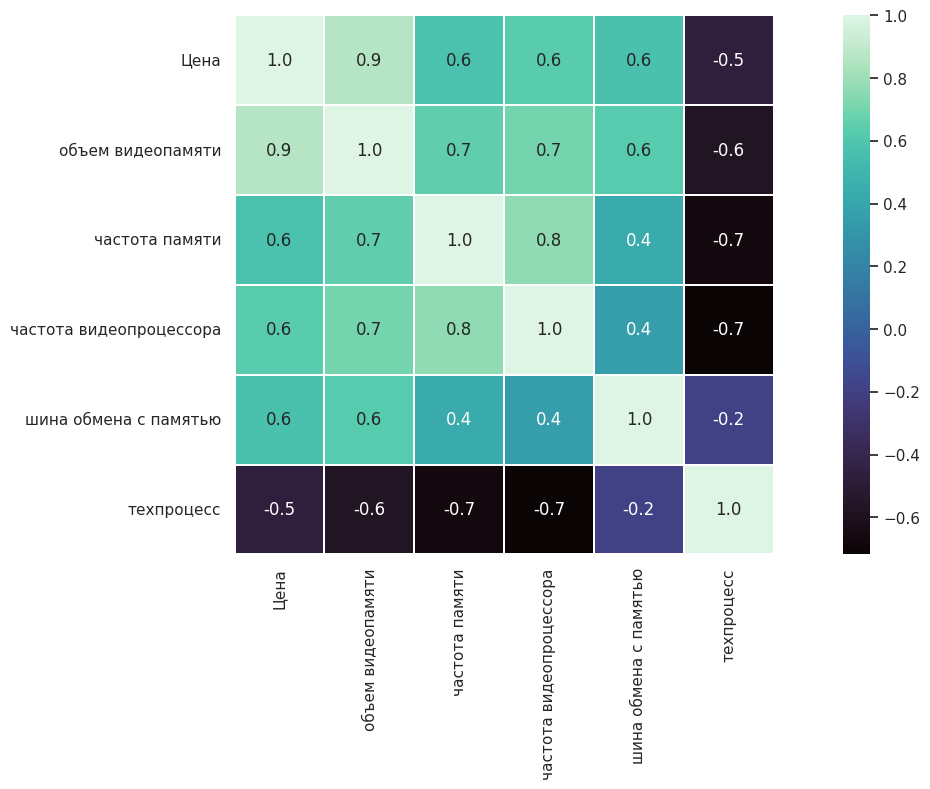

In [120]:
# Не удержался и в наглую украл с 3 семинара многоуважаемого Филипа 
# Из своего тут только данные и наикрасивейшая палитра

sns.heatmap(df_pl[num_data].corr(method='pearson'), 
            square=True, annot=True, fmt=".1f", 
            linewidths=0.1, cmap="mako");

По получившимся прекрасным графикам особо много **новых** выводов не сделаешь, но мы попытаемся! Так, например, явно видно, что значительная часть видеокарт от NVIDIA стоят дороже своих аналогов от других производителей, объём видеопамяти у всех фирм колеблется около 8 ГБ, что в принципе не удивительно, а техпроцесс также имеет обратную взаимосвязь с остальными характеристиками видеокарт 

Подведём небольшой итог по проделанной работе, в данном документе мы окончательно завершили разведочный анализ данных. Провели визуализацию по ТХ наших видеокарт, сделали ряд предположений о взаимосвязях между ними, которые впоследствии докажем с помощью гипотез, а также создали "4" новых признака, что мы будем использовать при обучении регрессионной модели! :) 

In [74]:
# Сохраним данные, ибо мы вывели 4 новых признака *по факту 1, но он разбивается на 3*
df_pl.to_csv('GCCompanies.csv', index=False)